# Redes Complejas 

## Trabajo Práctico 1

In [17]:
# Imports

import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_palette('dark')

### `nutrients.csv`

In [25]:
Graph = nx.read_edgelist('datos_tp1/nutrients.csv',delimiter=',')

#### (a) Representación del grafo

<ipython-input-29-e38ceaf06d2a>:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


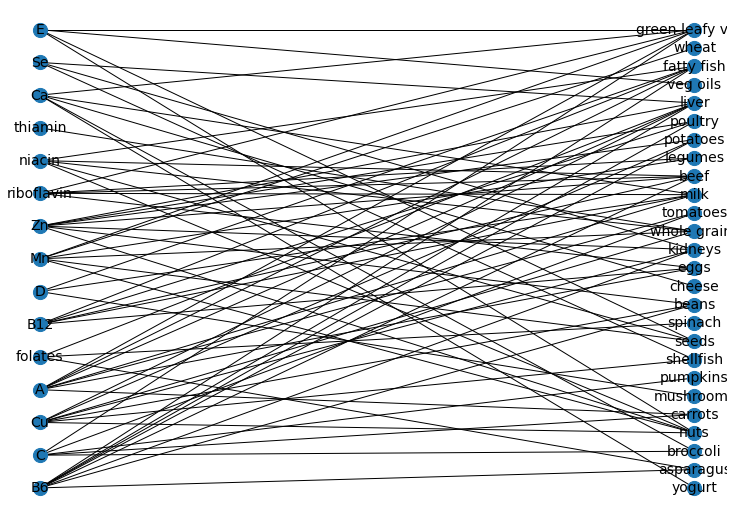

In [29]:
plt.figure(figsize=(10,7))
nx.draw(Graph,pos=nx.bipartite_layout(Graph,nodes=nutrients),
        with_labels=True,font_size=14,node_size=200)
plt.tight_layout()

#### (b) Gcc

In [30]:
gcc = max(nx.connected_components(Graph), key=len)

In [31]:
print(gcc,len(gcc))

{'yogurt', 'asparagus', 'folates', 'broccoli', 'nuts', 'carrots', 'mushrooms', 'pumpkins', 'shellfish', 'B12', 'Mn', 'riboflavin', 'seeds', 'E', 'niacin', 'spinach', 'beans', 'cheese', 'eggs', 'kidneys', 'whole grains', 'Cu', 'tomatoes', 'D', 'Zn', 'thiamin', 'milk', 'Se', 'B6', 'C', 'beef', 'legumes', 'green leafy vegs', 'potatoes', 'A', 'poultry', 'liver', 'veg oils', 'fatty fish', 'wheat', 'Ca'} 41


#### (c) Grado máximo

In [32]:
degrees = dict(nx.degree(Graph))
max_degree = max(degrees,key=degrees.get)
print(max_degree,',',degrees[max_degree])

B6 , 8


#### (c) Betweenness

In [33]:
betweenness = nx.betweenness_centrality(Graph)
max_betweenness = max(betweenness,key=betweenness.get)
print(max_betweenness,',',betweenness[max_betweenness])

A , 0.23308333590664387


#### (c) Closeness

In [34]:
closeness = nx.closeness_centrality(Graph)
max_closeness = max(closeness,key=closeness.get)
print(max_closeness,',',closeness[max_closeness])

A , 0.425531914893617


#### (d) Distancia promedio entre nodos

In [35]:
ASPL = nx.average_shortest_path_length(Graph)
print(ASPL)

3.2170731707317075


#### (e) Comparación gráfica de las tres medidas de centralidad

In [36]:
centrality_data = {}
for node in list(Graph.nodes):
    dg = degrees[node]
    btw = betweenness[node]
    close = closeness[node]
    results = {'Degree':dg,
              'Betweenness':btw,
              'Closeness':close}
    centrality_data[node] = results

df = pd.DataFrame(centrality_data).transpose()

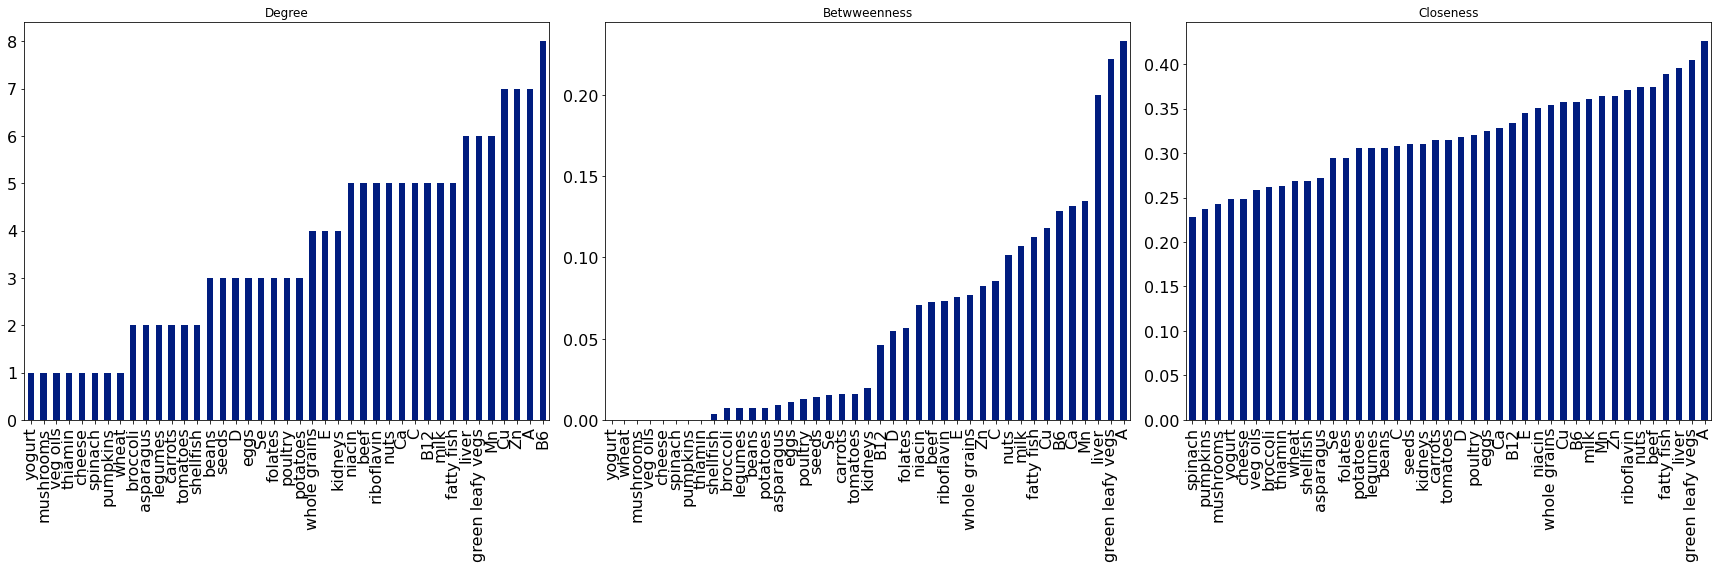

In [37]:
fig,axs = plt.subplots(1,3,figsize=(24,8))
df['Degree'].sort_values().plot(kind='bar',title='Degree',ax=axs[0],fontsize=16)
df['Betweenness'].sort_values().plot(kind='bar',title='Betwweenness',ax=axs[1],fontsize=16)
df['Closeness'].sort_values().plot(kind='bar',title='Closeness',ax=axs[2],fontsize=16)
plt.tight_layout()

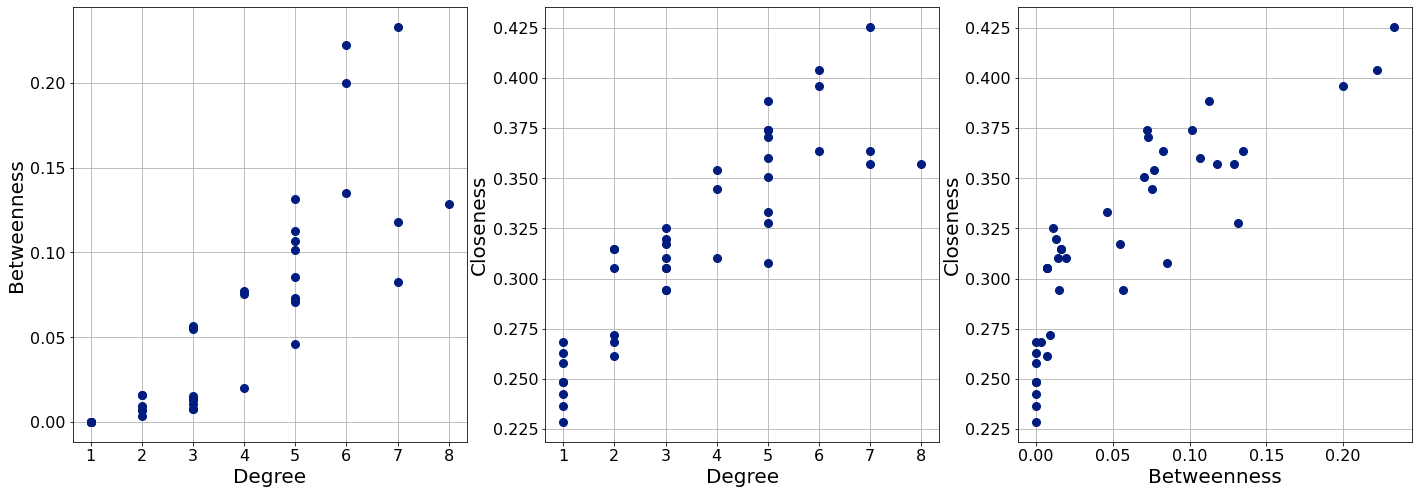

In [38]:
# Correlaciones

fig, axs = plt.subplots(1,3,figsize=(24,8))

axs[0].plot(df['Degree'],df['Betweenness'],'o',markersize=8)
axs[1].plot(df['Degree'],df['Closeness'],'o',markersize=8)
axs[2].plot(df['Betweenness'],df['Closeness'],'o',markersize=8)

axs[0].set_xlabel('Degree',fontsize=20)
axs[1].set_xlabel('Degree',fontsize=20)
axs[2].set_xlabel('Betweenness',fontsize=20)

axs[0].set_ylabel('Betweenness',fontsize=20)
axs[1].set_ylabel('Closeness',fontsize=20)
axs[2].set_ylabel('Closeness',fontsize=20)

axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=16)

axs[0].grid()
axs[1].grid()
axs[2].grid()

#### (f) Distribución de grado lineal y log-log

Text(0, 0.5, 'Relative freq.')

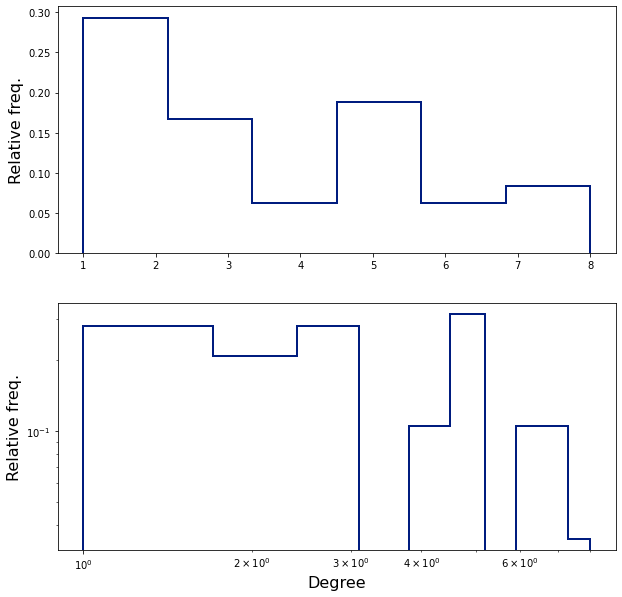

In [39]:
fig,axs = plt.subplots(2,1,figsize=(10,10))

axs[0].hist(df['Degree'],bins=6,density=True,histtype='step',linewidth=2)
axs[1].hist(df['Degree'],bins=10,density=True,histtype='step',linewidth=2)
axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[1].set_xlabel('Degree',fontsize=16)
axs[0].set_ylabel('Relative freq.',fontsize=16)
axs[1].set_ylabel('Relative freq.',fontsize=16)

#### (g) Representación del gráfico identificando nodos

<ipython-input-42-d717326734cd>:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


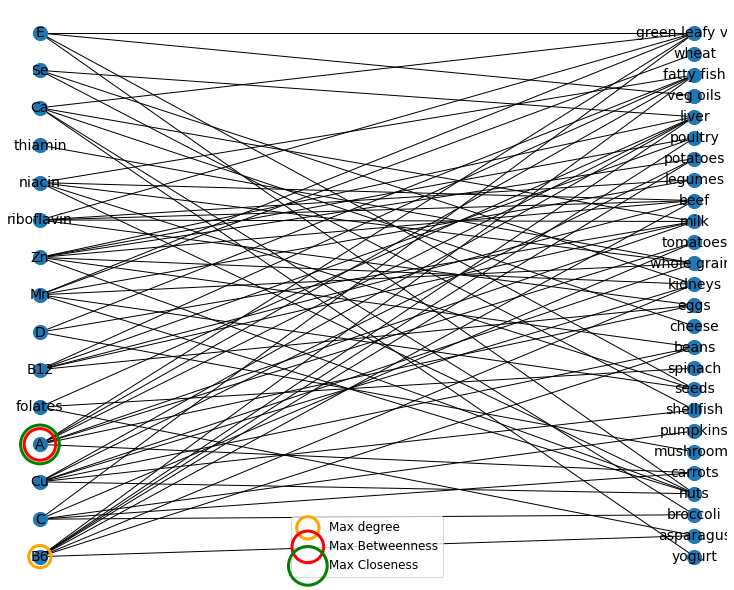

In [42]:
plt.figure(figsize=(10,8))

pos = nx.bipartite_layout(Graph,nodes=nutrients)

nx.draw(Graph,pos=pos,
        with_labels=True,font_size=14,node_size=200)

plt.scatter(pos['B6'][0],pos['B6'][1],facecolors='none',s=500,color='orange',linewidths=3,label='Max degree')
plt.scatter(pos['A'][0],pos['A'][1],facecolors='none',s=1000,color='red',linewidths=3,label='Max Betweenness')
plt.scatter(pos['A'][0],pos['A'][1],facecolors='none',s=1500,color='green',linewidths=3,label='Max Closeness')

plt.legend(fontsize=12)
plt.tight_layout()